In [12]:
import numpy as np
import os
import baobap as bao

In [13]:
from input_data import dynamical_regimes
from src.plotting import clustering_frequency_data

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter, LogFormatterSciNotation, FixedFormatter, FixedLocator
from matplotlib.patches import Rectangle, Arrow
from matplotlib.collections import PatchCollection
from cycler import cycler

In [15]:
%matplotlib inline

In [16]:
matplotlib.style.use("ggplot") # fivethirtyeight

cmap = plt.get_cmap("Accent")
bounds = [-1, 0, 1, 2, 3]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

matplotlib.rcParams.update({'figure.dpi': 600,
                     'font.size': 12,
                     'xtick.labelsize': 10,
                     'ytick.labelsize': 10
                    })

reducedblue = (*cmap(norm(1))[:3], .6)
reducedgreen = (*cmap(norm(-1))[:3], .6)
reducedgrey = (*cmap(norm(2))[:3], .6)
hatches = [".", "\\", "//"]

In [17]:
cmaplist = [cmap(norm(0)), cmap(norm(1)), reducedblue, cmap(norm(-1)), reducedgreen, reducedgrey]
cmap_pp = matplotlib.colors.ListedColormap(cmaplist)
norm_pp = matplotlib.colors.BoundaryNorm(np.arange(7), cmap_pp.N, clip=True)

In [18]:
dr = dynamical_regimes[0]
dr

{'consumer/producer': 1, 'P/K': 0.16666666666666666, 'D^2/KH': 0.01}

In [19]:
name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
sim_dir = os.path.join("simulation_data/resubmission/northern", name)
print(sim_dir)

_, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
sides = ana[5]
swingpar = ana[3]
pp_sparsity = ana[6]
pp_alphas = np.load(os.path.join(sim_dir, "alphas.npy"))[::pp_sparsity]
pp_result_dir = os.path.join(sim_dir, "results_pp")
pp_result_file = os.path.join(sim_dir, "results_pp.hdf")
number_of_desync, n_clusters, sync, solitary, exotic_solitary, composite, exotic_composite, other = clustering_frequency_data(pp_result_dir, pp_result_file, ana[3])


alpha_subset = [0, 1, 3, -1] 


simulation_data/resubmission/northern/cp_1_PK_0p167_D2KH_0p010


In [20]:
res = 3. * exotic_solitary + 1. * solitary + 0. * sync + 5. * other + 2. * composite + 4. * exotic_composite

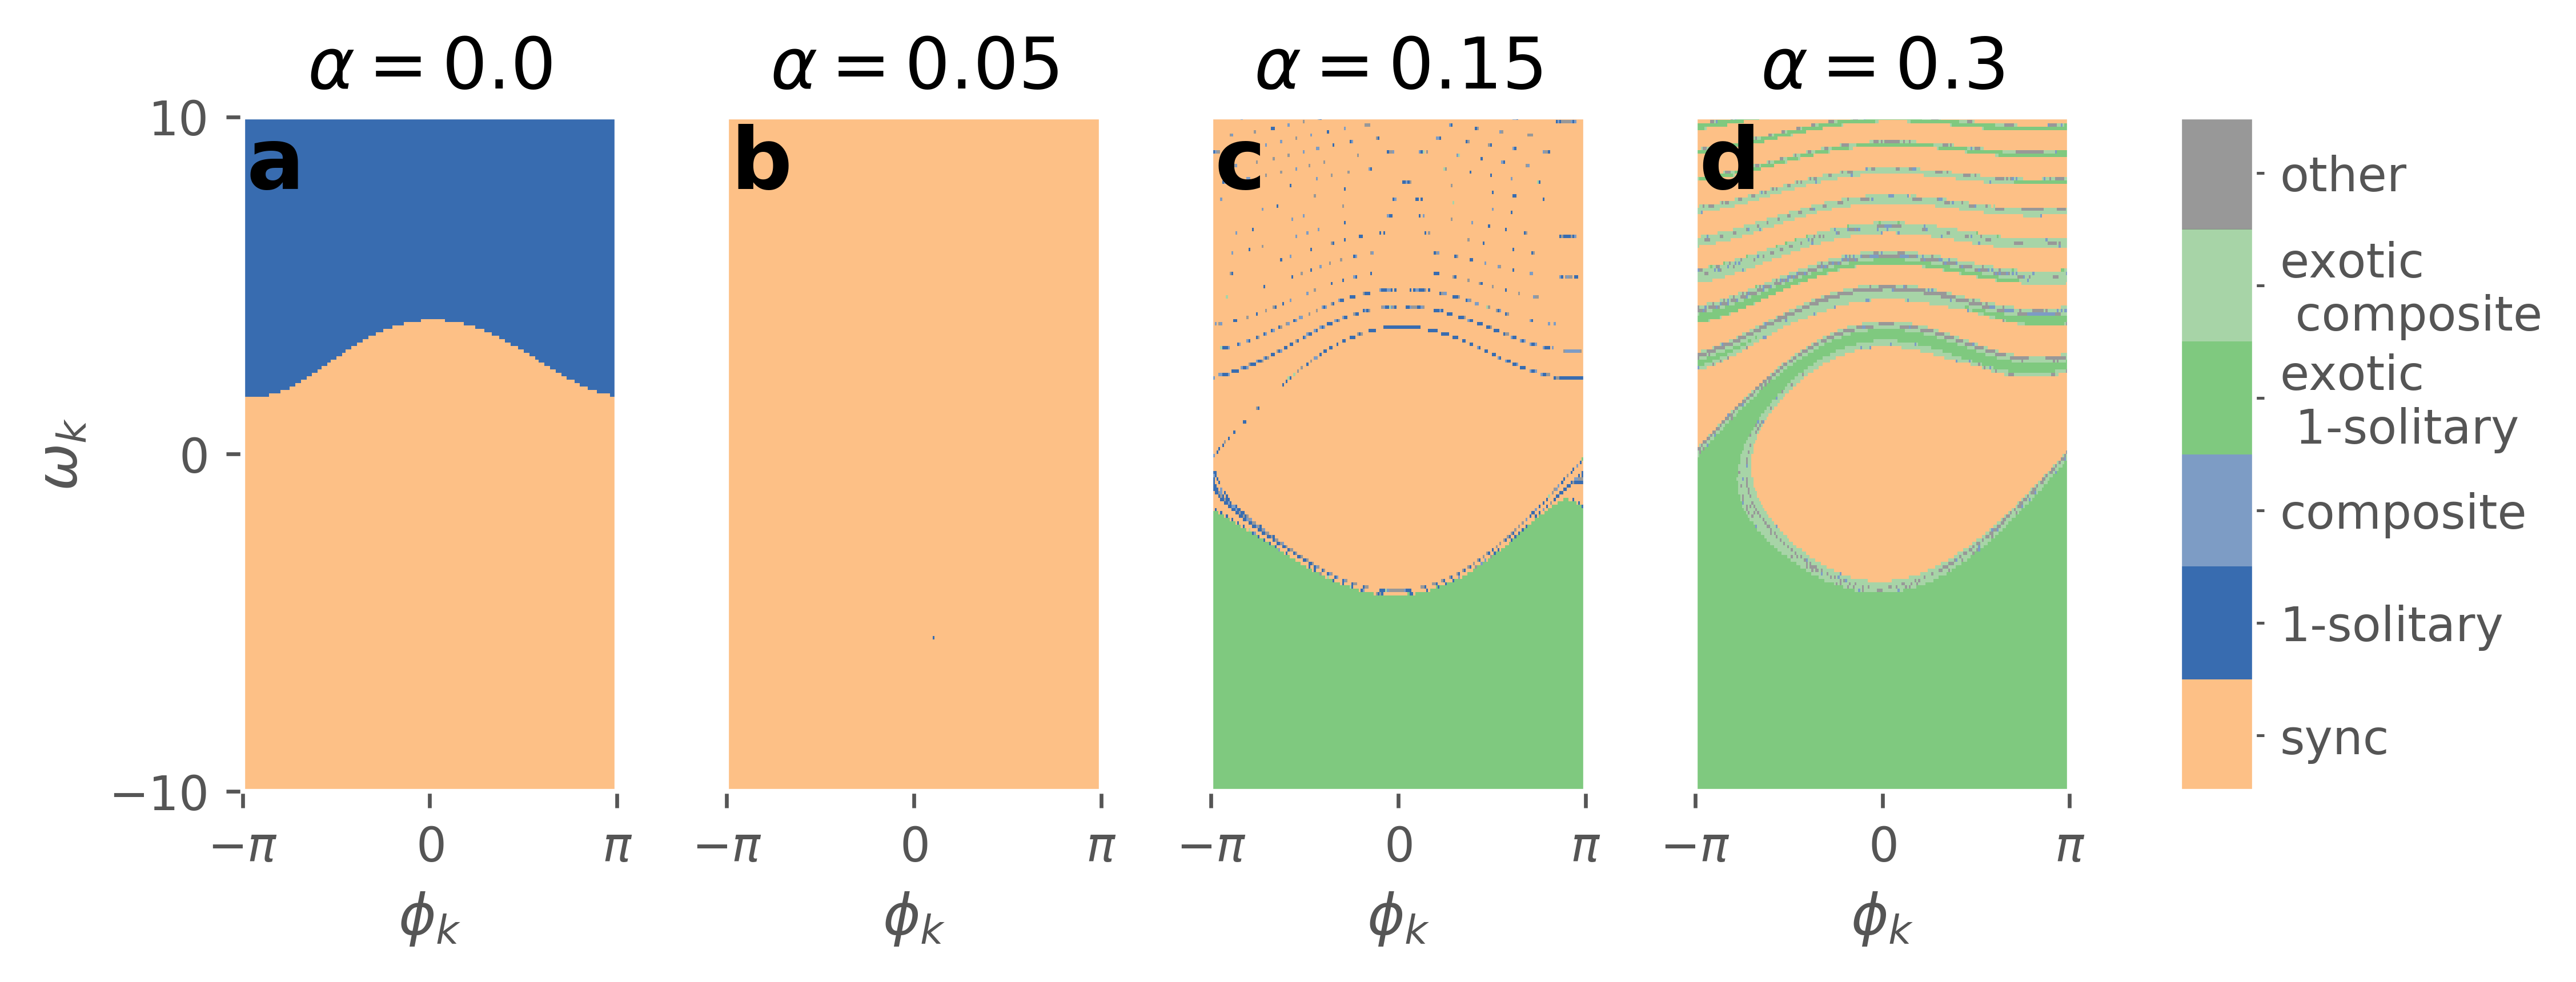

In [21]:
fig = plt.figure(figsize=(8.27, 6))

labels = "abcd"

w = np.ones( len(alpha_subset) + 2)
w[-2:] = 0.2
gs = fig.add_gridspec(2, len(w), wspace=0.4, hspace=0.3, width_ratios=w)
axes = [fig.add_subplot(gs[0, k]) for k in range(len(alpha_subset))]

for alpha_idx, ax in enumerate(axes):
    ax.grid(False)
    ax.set_xticks([-np.pi, 0, np.pi])
    ax.set_xlabel(r"$\phi_k$", fontsize=12)
    ax.set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"]) #, fontsize=12)#, position=(0., 0.07))
    ax.set_yticks([])
    
    res_shape = res[:, alpha_subset[alpha_idx]].reshape((sides, sides))
    # res[res > 2] = 2
    
    im = ax.imshow(res_shape,
                   extent=[-np.pi, np.pi, -10, 10], aspect="auto", 
                   interpolation="nearest",  cmap=cmap_pp, norm=norm_pp
                  )
    
    ax.set_title(r"$\alpha=${}".format(pp_alphas[alpha_subset[alpha_idx]]), fontsize=15)
    ax.text(0.01, 0.99, labels[alpha_idx], ha='left', va='top', fontsize=18, weight='bold', transform=ax.transAxes, zorder=10)
    
axes[0].set_yticks([-10, 0, 10])
axes[0].set_ylabel(r"$\omega_k$", fontsize=12)

ax = fig.add_subplot(gs[0, -2])
cbar = plt.colorbar(cax=ax, mappable=im)
cbar.ax.yaxis.set_minor_locator(FixedLocator([0.083, 0.25, 0.417, 0.583, 0.75, 0.917]))
cbar.ax.yaxis.set_minor_formatter(FixedFormatter(["sync", "1-solitary", "composite", "exotic\n 1-solitary", "exotic\n composite", "other"]))

cbar.set_ticks([])



In [22]:
max_alpha = 0.3
batch_size = 1000.

ax = fig.add_subplot(gs[1, :-2])

ax.grid(True)
ax.set_ylim(-0.5, batch_size * 1.01)
ax.set_xlim(0, max_alpha)
ax.axvline(x=0.24, c="k", linestyle="-", linewidth=1, zorder=10)
ax.grid(False)

ticks = ax.get_yticks()
ax.yaxis.set_ticks_position('both')
ax.set_yticklabels(["{:g}".format(t/batch_size) for t in ticks])


name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
sim_dir = os.path.join("simulation_data/resubmission/northern", name)
print(sim_dir)
alphas = np.load(os.path.join(sim_dir, "alphas.npy"))

_, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
result_dir = os.path.join(sim_dir, "results_ASBS")
result_file = os.path.join(sim_dir, "results_ASBS.hdf")
number_of_desync, n_clusters, sync, solitary, exotic_solitary, composite, exotic_composite, other = clustering_frequency_data(result_dir, result_file, ana[3])

avg_desync = np.mean(number_of_desync, axis=0)

stacks = ax.stackplot(alphas, 
             np.sum(exotic_solitary, axis=0),
             np.sum(exotic_composite, axis=0),
             np.sum(solitary, axis=0),
             np.sum(composite, axis=0),
             np.sum(other, axis=0), 
             np.sum(sync, axis=0), 
             baseline="zero",
             colors=[cmap(norm(-1)), reducedgreen, cmap(norm(1)), reducedblue, reducedgrey, cmap(norm(0))],
             edgecolor="w"
             )

ax.set_ylabel("ASBS", fontsize=12)
ax.set_xlabel(r"$\alpha$", fontsize=12)

ax.text(0.01, 0.99, "e", ha='left', va='top', fontsize=18, weight='bold', transform=ax.transAxes, zorder=10)

ax2 = ax.twinx()
ax2.set_ylim(0, 15)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position("right")
ax2.spines['right'].set_color("tab:purple")
ax2.tick_params(axis='y', colors="tab:purple")
ax2.yaxis.label.set_color("tab:purple")
ax2.plot(alphas, avg_desync, "k-", alpha=1, linewidth=2.5, color="tab:purple")
ax2.set_ylabel(r"$\overline{N_d}$", rotation=0)
ax2.grid(False)


fig.savefig("figures/fig2.pdf", facecolor="w", bbox_inches = 'tight')

simulation_data/resubmission/northern/cp_1_PK_0p167_D2KH_0p010
